In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot') # make plots look better

ModuleNotFoundError: No module named 'seaborn'

In [4]:
!pip3 install seaborn

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 292 kB 1.1 MB/s eta 0:00:01


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot') # make plots look better

In [8]:
df = pd.read_csv("shuffled_features.csv")

In [9]:
print(df.head())

   Duration of flow  no of packets  no of bytes  pair flows  \
0          3.000000     320.142857  31374.00000    1.142857   
1          3.294873       0.199032     19.19956    0.000000   
2          5.285714     542.714286  53186.00000    1.142857   
3          6.285714     637.142857  62440.00000    1.142857   
4          3.571429     390.142857  38234.00000    1.142857   

   growth of single flows  growth of different ports  Label  
0                0.000000                   0.579067      0  
1             1574.048251                   0.207795      1  
2                0.000000                   0.578682      0  
3                0.000000                   0.578516      0  
4                0.000000                   0.575637      0  


In [10]:
print (df.describe())

       Duration of flow  no of packets   no of bytes  pair flows  \
count         82.000000      82.000000     82.000000   82.000000   
mean           3.782884     268.363618  26299.441157    0.710801   
std            1.264996     241.168905  23634.770470    0.557582   
min            1.285714       0.001931      0.081095    0.000000   
25%            3.119129       0.115202     10.057572    0.000000   
50%            3.335786     277.071429  27153.000000    1.142857   
75%            4.285714     477.785714  46823.000000    1.142857   
max            6.571429     683.142857  66948.000000    1.142857   

       growth of single flows  growth of different ports      Label  
count               82.000000                  82.000000  82.000000  
mean               876.368022                   0.414248   0.378049  
std               1316.831894                   0.212372   0.487884  
min                  0.000000                   0.069403   0.000000  
25%                  0.000000        

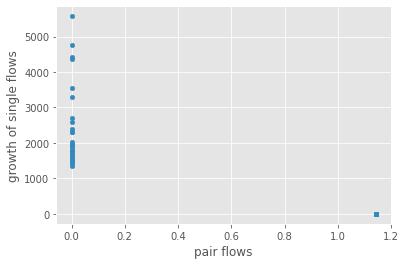

In [11]:
df.plot.scatter(x="pair flows", y="growth of single flows")

plt.show()

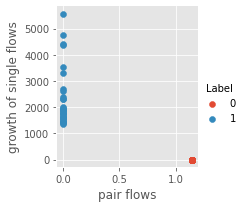

In [12]:
sns.FacetGrid(df, 
    hue="Label").map(plt.scatter, "pair flows", "growth of single flows").add_legend()

plt.show()

In [13]:
labels = np.asarray(df.Label)

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(labels)

# apply encoding to labels
labels = le.transform(labels)

In [16]:
df.sample(5)

,Duration of flow,no of packets,no of bytes,pair flows,growth of single flows,growth of different ports,Label
59,3.341176,0.094964,8.988130,0.000000,1903.439548,0.150967,1
0,3.000000,320.142857,31374.000000,1.142857,0.000000,0.579067,0
4,3.571429,390.142857,38234.000000,1.142857,0.000000,0.575637,0
68,3.197117,0.100339,9.591995,0.000000,1737.659757,0.176831,1
38,3.285714,360.142857,35294.000000,1.142857,0.000000,0.578733,0


In [18]:
df_selected = df.drop(['pair flows', 'growth of single flows', "Label"], axis=1)

In [19]:
df_features = df_selected.to_dict(orient='records')

In [20]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
features = vec.fit_transform(df_features).toarray()

In [21]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, 
    test_size=0.20, random_state=42)

In [22]:
# import
from sklearn.ensemble import RandomForestClassifier

# initialize
clf = RandomForestClassifier()

# train the classifier using the training data
clf.fit(features_train, labels_train)

RandomForestClassifier()

In [23]:
# compute accuracy using test data
acc_test = clf.score(features_test, labels_test)

print ("Test Accuracy:", acc_test)
# Test Accuracy: 0.98

Test Accuracy: 1.0


In [24]:
# compute accuracy using training data
acc_train = clf.score(features_train, labels_train)

print ("Train Accuracy:", acc_train)
# Train Accuracy: 0.98

Train Accuracy: 1.0


In [26]:
from sklearn.svm import SVC
clf = SVC()

In [27]:
clf.fit(features_train, labels_train)

SVC()

In [28]:
# compute accuracy using test data
acc_test = clf.score(features_test, labels_test)

print ("Test Accuracy:", acc_test)
# Test Accuracy: 0.98

Test Accuracy: 1.0
